# Introduction to DigitalGlobe Sensors

This notebook is an introduction to the various DigitalGlobe sensors and how to access them in `gbdxtools`. This is meant to be a high-level glance at how image class differ from one another and how initialize images in python for analysis. We'll cover a quick introduction to searching the DG Catalog for imagery and then move into initializing images. 

Outline 

* [Searching for Imagery](#Searching)
* [Worldview 3](#Worldview 3)
* [Worldview 2](#Worldview 2)
* [Ikonos](#Ikonos)
* [Landsat Imagery](#Landsat)

### Searching for imagery

Finding data is typically the first step in most projects. There are numerous resources that can help you learn how to search for images. See the [gbdxtools docs](http://gbdxtools.readthedocs.io/en/latest/catalog_search.html) or the [GBDX University Docs](https://gbdxdocs.digitalglobe.com/docs/catalog-v2-course). 

For the purpose of this tutorial we'll be introducing the various sensor based image classes within `gbdxtools`. The goal of this notebook isn't to cover the specifics of each sensor in depth, but introduce ways to find imagery and init specific image classes. 

First we'll define a very simple `search` method that we'll use to search for specific `item_types` in the catalog. This method just returns the id of the record and we'll blindly be initializing records from those ids. 

In [1]:
from shapely.geometry import box
from gbdxtools import Interface
gbdx = Interface()

def search(item_type, bbox=[-104.1, 39.9, -104.0, 40.0]):
    aoi = box(*bbox).wkt
    query = "item_type:{}".format(item_type)
    if item_type is not 'Landsat8':
        query += " AND item_type:DigitalGlobeProduct".format(item_type)
    res = gbdx.vectors.query(aoi, query)
    return [a['properties']['attributes']['catalogID'] for a in res]

### Image Classes

Image classes in `gbdxtools` have been built to help make it easy to not only fetch data, but to provide sensor specific helpers when working with data. For instance, when working multi-spectral data an image class provides an `rgb()` method that returns an array of the sensor's red/green/blue bands.

Each of the image classes discussed below can be created in 2 ways, either via the `CatalogImage` class or via a specific sensor class (`WV03_VNIR`, `WV02`, `Landsat`, etc). The `CatalogImage` class is a wrapper method that takes a `CatalogID` and determines which of the image classes matches the given id. 

### Worldview 3

#### Spectral Bands
* Panchromatic band
* Multispectral 4-band: 4 standard VNIR colors are blue, green, red, near-IR1
* Multispectral 8-band: 4 additional VNIR colors are coastal, yellow, red edge, and near-IR2
* Shortwave infrared resolution: 8 SWIR bands that penetrate haze, fog, smog, dust, and smoke

#### Date Range
* August 13, 2014 – present

Worldview3 images are indexed in the GBDX Catalog as `WV03_VNIR` (Visible/Near-Infrared) and `WV03_SWIR` (Shortwave-Infrared). For `WV03_VNIR` images both multi-spectral and panchromatic data are available. Gbdxtools groups the different bands behind scenes and provides direct access to both via the `band_type=Pan|MS` parameter.

In [2]:
from gbdxtools import CatalogImage, WV03_VNIR

ids = search('WV03_VNIR', bbox=[-95.302, 29.742, -95.285, 29.758])

catalog_img = CatalogImage(ids[-1])
isinstance(catalog_img, WV03_VNIR)

wv3_img = WV03_VNIR(ids[-1])
isinstance(wv3_img, WV03_VNIR)

True

### Worldview 2

#### Spectral Bands
* Panchromatic band
* Multispectral 4-band: 4 standard VNIR colors are blue, green, red, near-IR1
* Multispectral 8-band: 4 additional VNIR colors are coastal, yellow, red edge, and near-IR2

#### Date Range
* October 2009 – present



In [3]:
from gbdxtools import CatalogImage, WV02

ids = search('WV02')

cat_img = CatalogImage(ids[0])
isinstance(cat_img, WV02)

wv2 = WV02(ids[0])
isinstance(wv2, WV02)

True

### Ikonos

#### Spectral Bands
* Panchromatic band
* Multispectral 4-band

#### Date Range
* 2000-2014

In [4]:
from gbdxtools import CatalogImage, IkonosImage

iko = CatalogImage('2001110218231680000010116110', proj="EPSG:4326")
isinstance(iko, IkonosImage)

True

### Landsat

#### Date Range
* March 2013-Current

Landsat8 Images (served from AWS S3) are indexed as `Landsat8` item_types. These images are 11 band images at ~30m resolution (visual) and ~15m (panchromatic). [More information on Landsat8 bands](https://landsat.gsfc.nasa.gov/landsat-8/landsat-8-bands/).

In [5]:
from gbdxtools import CatalogImage, LandsatImage

ids = search('Landsat8')

catalog_img = CatalogImage(ids[0])
isinstance(catalog_img, LandsatImage)

lsat = LandsatImage(ids[0])
isinstance(lsat, LandsatImage)

True

### Other Image Types

In addition to the above image classes, gbdxtools provides access to 2 other image types: `TmsImage` and `DemImage`. These classes behave differently than the classes above in that they are not index on per scene or per image basis. They are global image access classes. This means that when provided with an AOI they fetch data from a global dataset, but still provide the same basic features as the classes above.

### TmsImage

The TMS Image class fetches data from the GBDX Maps API. These data are high-resolution, RGB, Uint8 images, and represent a global mosiac of hand selected imagery. These have a number of useful purposes from Machine Learning Training to Base Layer Matching.   

(3, 321, 1317)


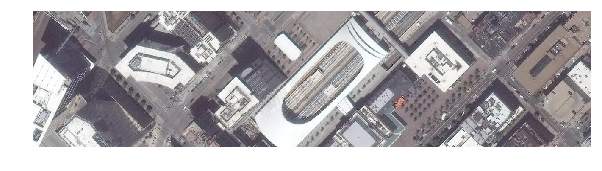

In [9]:
from gbdxtools import TmsImage

token = "pk.eyJ1IjoiZGlnaXRhbGdsb2JlIiwiYSI6ImNqMXkyZXZsODAwYWszMmsyM3lvZHBzMWsifQ.EYqlvq6QWczWsvrEDDTf7g"
tms = TmsImage(access_token=token, zoom=18, bbox=[-105.00444889068605, 39.75299710099606, -104.9962091445923, 39.75431683540881])
print tms.shape
tms.plot()

### DemImage

The `DemImage` class provides global access to DEM data from SRTM.

Fetching Image... 4 tiles


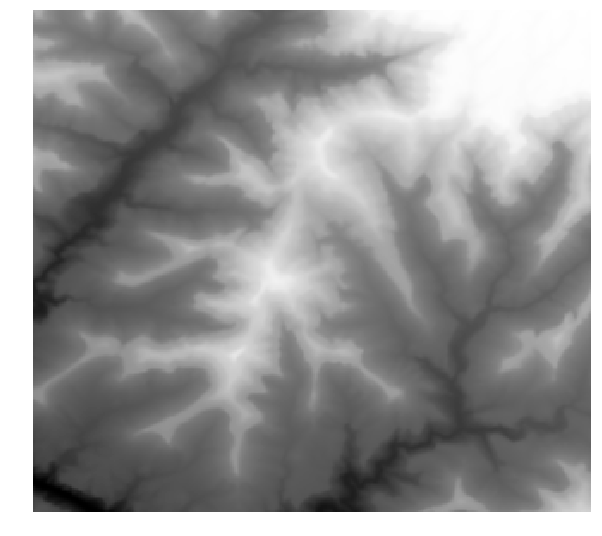

In [7]:
from gbdxtools import DemImage

dem = DemImage(bbox=[-112.077, 36.094, -111.989, 36.173])
dem.plot()